# Time Series Descomposition  - Bitcoins Cryptocurrencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from binance.client import Client

In [ ]:
# Configure your Binance API Key and API Secret
api_key = ''
api_secret = ''

# Initialize Binance client
client = Client(api_key, api_secret)

In [ ]:
# def obtener_datos_historicos(symbol, intervalo, periodo):
#     klines = client.get_historical_klines(symbol, intervalo, periodo)
#     datos = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
#     datos['timestamp'] = pd.to_datetime(datos['timestamp'], unit='ms')
#     datos.set_index('timestamp', inplace=True)
#     return datos

In [ ]:
# get historical data per minute
def get_historical_data_minute(symbol, period, start):
    client = Client()
    klines = []
    while True:
        data = client.get_historical_klines(symbol, period, start, limit=1000)
        if len(data) == 0:
            break
        klines.extend(data)
        inicio = int(data[-1][0]) + 1
    columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    data = pd.DataFrame(klines, columns=columns)
    data['timestamp'] = pd.to_datetime(datos['timestamp'], unit='ms')
    data.set_index('timestamp', inplace=True)
    return data



In [ ]:
# Obtener datos históricos de BTCUSDT
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
period = '180 days ago UTC'
data = get_historical_data_minute(symbol, intervalo, periodo)
data

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2023-08-22,26126.92000000,26139.42000000,25300.00000000,26056.00000000,34247.06688000,1692748799999,886782344.16029290,603624,16436.92888000,425661908.61497380,0
2023-08-23,26055.99000000,26819.27000000,25812.82000000,26432.72000000,44023.69978000,1692835199999,1156326251.92241100,673711,21955.66524000,576734438.29540010,0
2023-08-24,26432.71000000,26577.87000000,25864.00000000,26180.05000000,30205.22116000,1692921599999,792966965.89826580,575619,13987.93493000,367233375.41684340,0
2023-08-25,26180.05000000,26314.05000000,25777.15000000,26060.01000000,27753.33772000,1693007999999,722611079.18980740,611438,13258.65894000,345214226.91825400,0
2023-08-26,26060.00000000,26125.77000000,25985.92000000,26017.37000000,10022.22322000,1693094399999,261041530.47580380,329412,4681.90628000,121952627.59767490,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,49917.28000000,50368.61000000,48300.95000000,49699.59000000,55551.56706000,1707868799999,2745025370.06744710,1741811,28409.79337000,1403783512.68099050,0
2024-02-14,49699.60000000,52043.71000000,49225.01000000,51795.17000000,57046.37401000,1707955199999,2919604456.72331270,1859392,29664.51830000,1518339681.33460220,0
2024-02-15,51795.17000000,52816.62000000,51314.00000000,51880.00000000,53816.03055000,1708041599999,2802825737.99201540,1786569,26722.58656000,1391971339.71580590,0


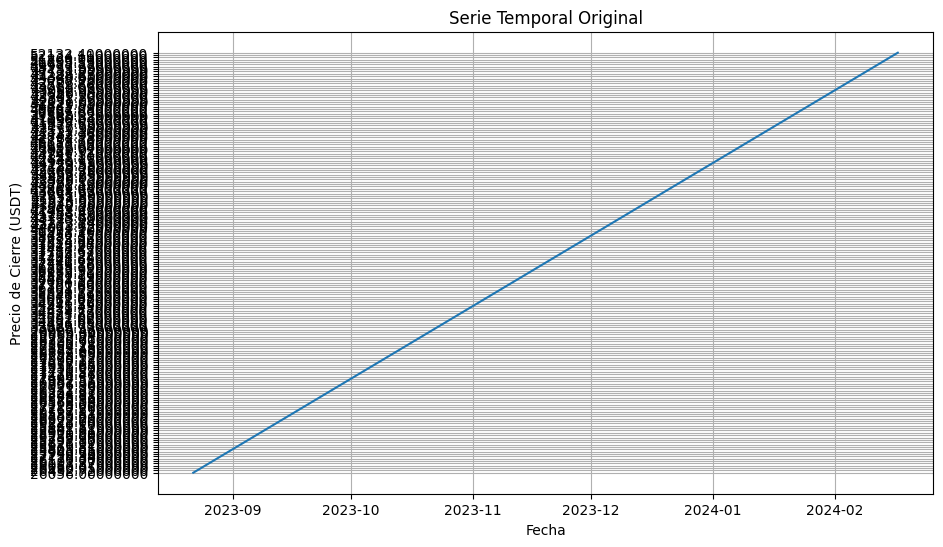

In [ ]:
# Visualizar la serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(datos['close'])
plt.title('Serie Temporal Original')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USDT)')
plt.grid(True)
plt.show()


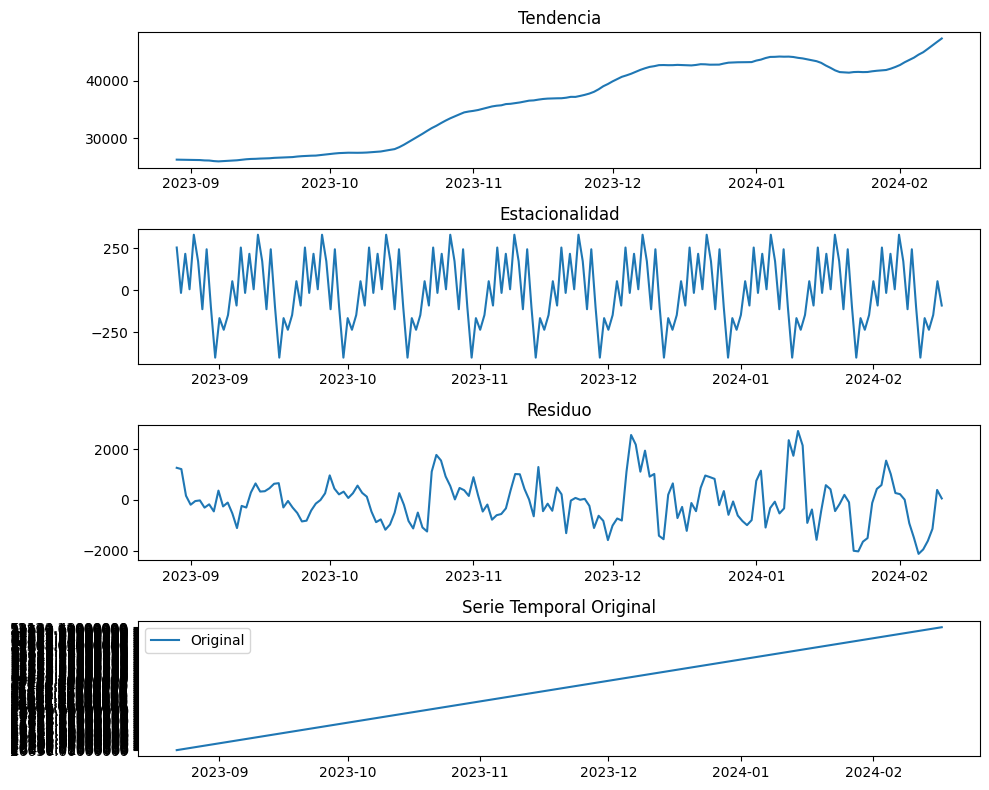

In [ ]:
# Descomposición estacional
decomposicion = seasonal_decompose(datos['close'], model='additive', period=15)  # Suponiendo una estacionalidad de 30 días

# Visualizar los componentes
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposicion.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decomposicion.seasonal)
plt.title('Estacionalidad')

plt.subplot(4, 1, 3)
plt.plot(decomposicion.resid)
plt.title('Residuo')

plt.subplot(4, 1, 4)
plt.plot(datos['close'], label='Original')
plt.legend()
plt.title('Serie Temporal Original')

plt.tight_layout()
plt.show()
